In [48]:
import pickle
import numpy as np
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader

Customized DataLoader

In [49]:
class custom_train_dataset(Dataset):
    def __init__(self, data_dir, train=True, transform=None):
        
        self.data_dir = data_dir
        
        if train:
            self.input_path = '/train'
            self.target_path = '/train.pkl'
        else:
            self.input_path = '/valid'
            self.target_path = '/valid.pkl'
            
         # open pickle file
        with open(self.data_dir + self.target_path, 'rb') as f:
            self.data = pickle.load(f)
            self.target = np.array(self.data[['n', 'potential']])
            
        if transform is None:
            self.transform = torch.Tensor #Numpy로 읽은 것을 torch tensor로 변환.
        else:
            self.transform = transform
            
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, index):
        
        img_name = self.data_dir + '/' + self.data.iloc[index, -1]
        with Image.open(img_name) as img_PIL:
            img = self.transform(np.array(img_PIL))
        label = self.transform(self.target[index])
        
        return img, label

In [50]:
min_batch = 64
custom_train_data = custom_train_dataset('./pbl_data', train=True)
custom_test_data = custom_train_dataset('./pbl_data', train=False)
train_loader = DataLoader(dataset=custom_train_data, batch_size=min_batch, shuffle=True)
test_loader = DataLoader(dataset=custom_test_data, batch_size=min_batch, shuffle=False)

In [59]:
x, y = next(iter(train_loader))
x, y

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 

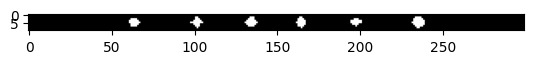

In [54]:
import matplotlib.pyplot as plt
plt.imshow(x[0], cmap='gray')
plt.show()